In [77]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.figure import Figure
%matplotlib inline
import matplotlib.pylab as pylab

In [78]:
data_org = pd.read_csv('data_merge.csv')

In [79]:
#only forcus on store one department one
#for i in data_org.Store.unique:
data = data_org[data_org.Store == 1][ data_org.Dept ==1]

data['Sales_Date'] =pd.to_datetime(data.Sales_Date)

data.head()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Store,Dept,Sales_Date,Season,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Is Holiday,Target_Variable
33,1,1,2010-02-05,1,24924.50,42.31,2.572,211.096358,8.106,0,1
101,1,1,2010-02-12,1,46039.49,38.51,2.548,211.242170,8.106,1,1
169,1,1,2010-02-19,1,41595.55,39.93,2.514,211.289143,8.106,0,1
225,1,1,2010-02-26,1,19403.54,46.63,2.561,211.319643,8.106,0,0
327,1,1,2010-03-05,1,21827.90,46.50,2.625,211.350143,8.106,0,0


In [98]:
x = data['Sales_Date'].dt.date
y = data['Weekly_Sales']
y1 = data['Temperature']
y2 = data['Fuel_Price']
y3 = data['CPI']
y4 = data['Unemployment']

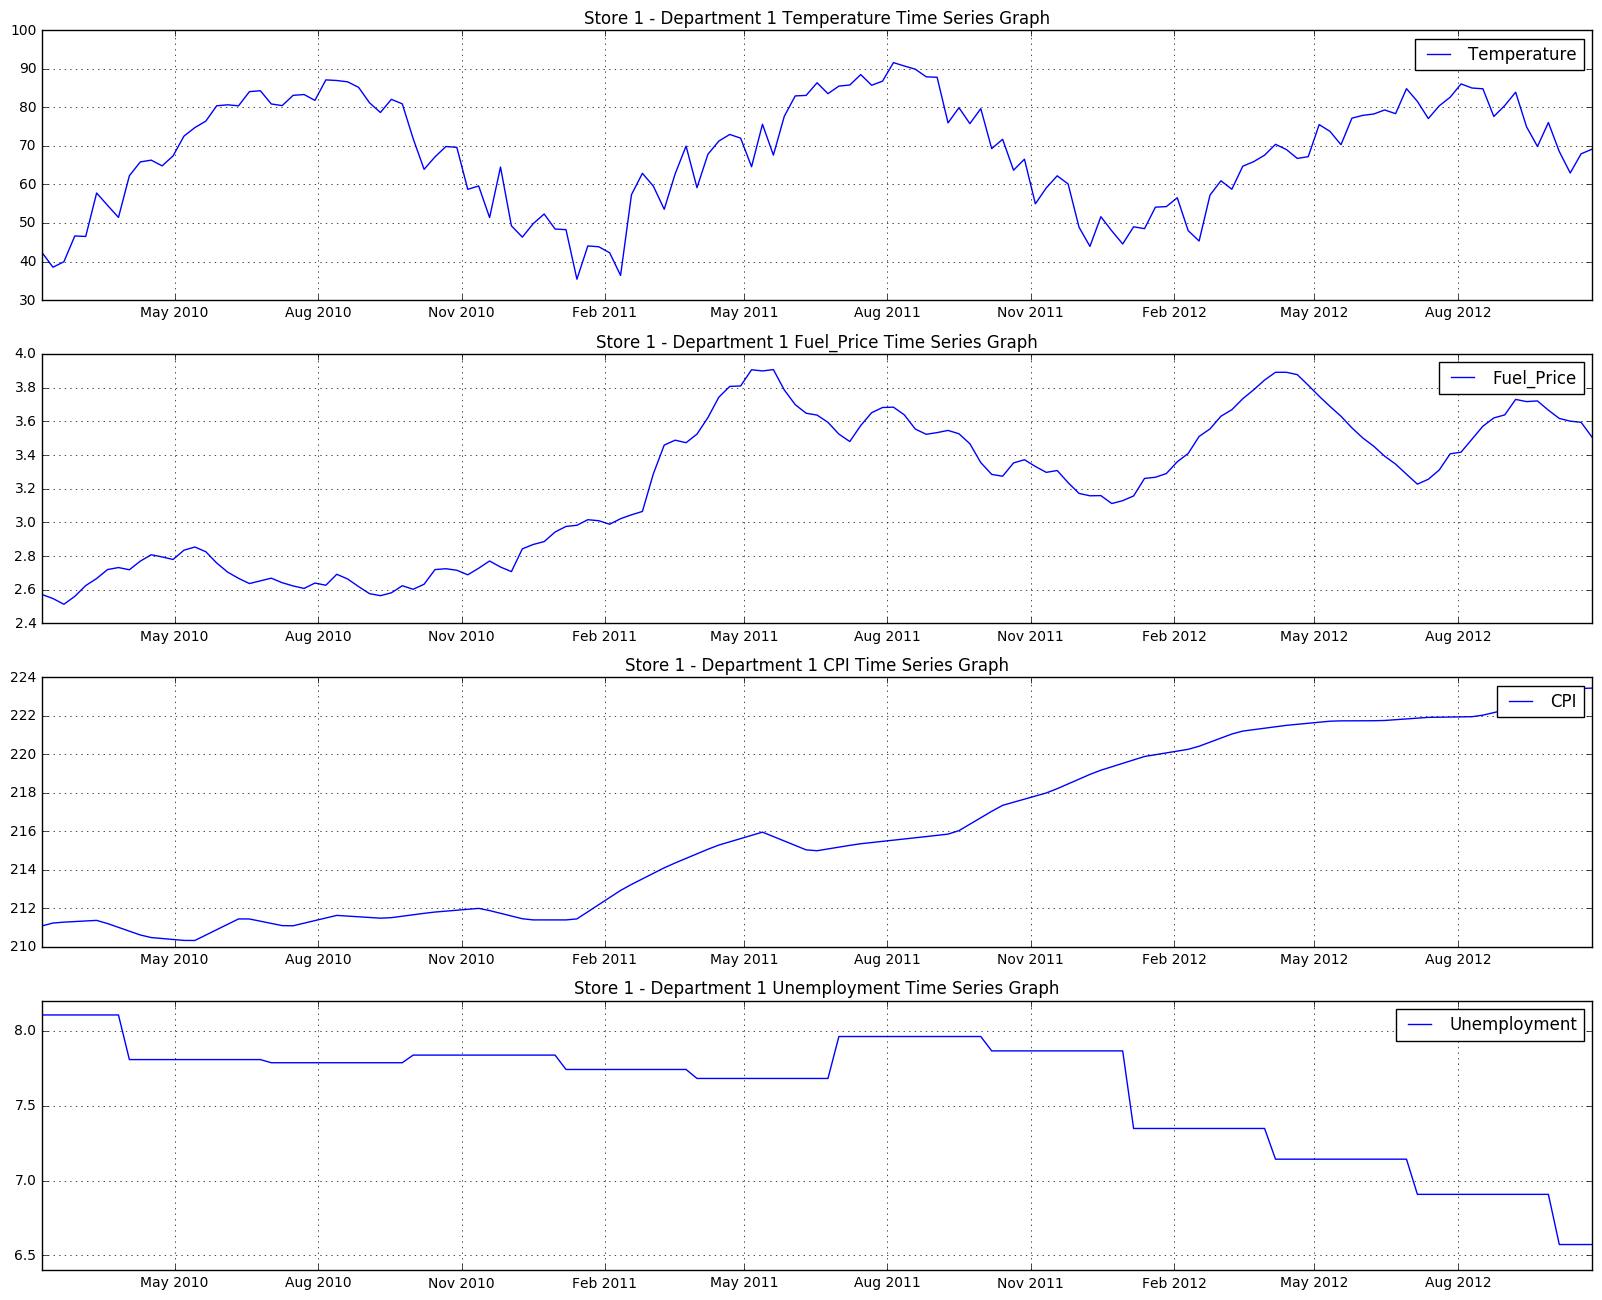

In [101]:
plt.rcParams['figure.figsize'] = 20, 16
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4)

ax1.plot(x,y1,label = 'Temperature')
ax2.plot(x,y2,label= 'Fuel_Price')
ax3.plot(x,y3,label = 'CPI')
ax4.plot(x,y4,label = 'Unemployment')

axs = [ax1,ax2,ax3,ax4]
for ax in axs:
    #ax.plot(x,y,label = 'Weekly_Sales')
    ax.grid()
    ax.legend()
    ax.set_title('Store 1 - Department 1 '+ax.get_legend_handles_labels()[1][0] + ' Time Series Graph')

In [73]:
data['Year'] = pd.to_datetime(data['Sales_Date']).dt.year
seasonal_means = data[['Year','Season','Weekly_Sales']].groupby(['Year','Season']).mean()
seasonal_means.columns = ['Weekly_Means']
data = data.join(seasonal_means, on=['Year','Season'] , rsuffix='_r')

In [74]:
len(data)

143

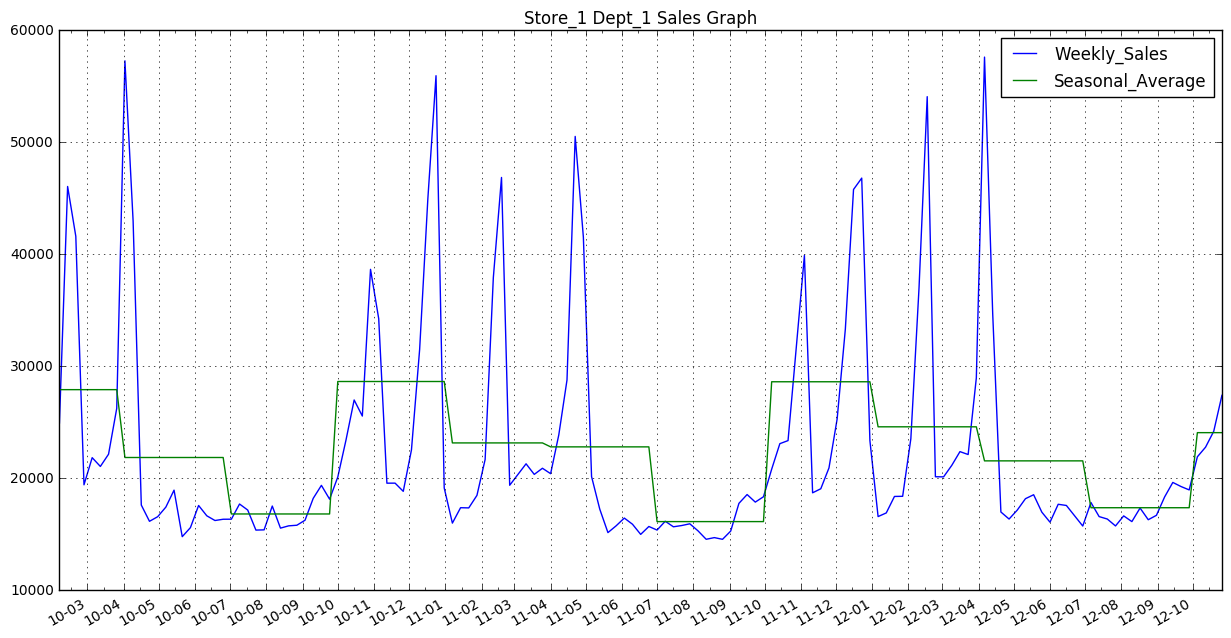

In [76]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter

fig,ax = plt.subplots(1)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(DateFormatter('%y-%m',tz=None))
ax.xaxis.set_minor_formatter(NullFormatter())

ax.plot(data['Sales_Date'],data['Weekly_Sales'],label = 'Weekly_Sales')
ax.plot(data['Sales_Date'],data['Weekly_Means'],label = 'Seasonal_Average')

ax.grid()
ax.legend()
ax.set_title("Store_1 Dept_1 Weekly Sales Graph")

fig.autofmt_xdate()

In [ ]:
"""
From the graph, we can see
"""